In [6]:
import pickle as pk
X_, y_ = pk.load(open('/content/ppg_spec_maps.unknown','rb'))

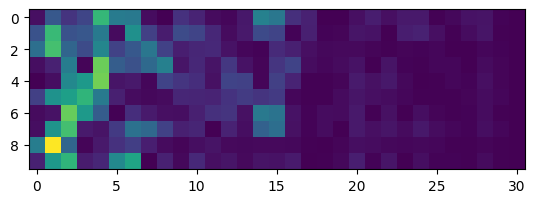

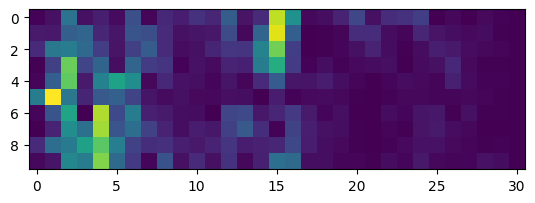

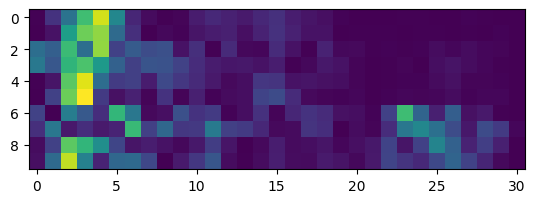

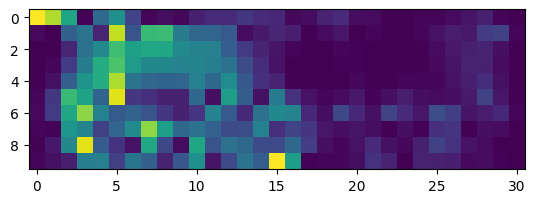

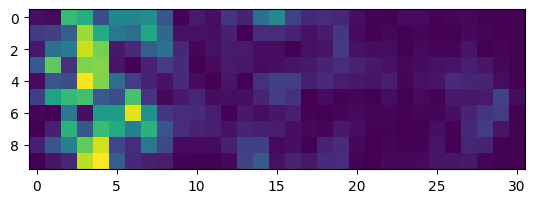

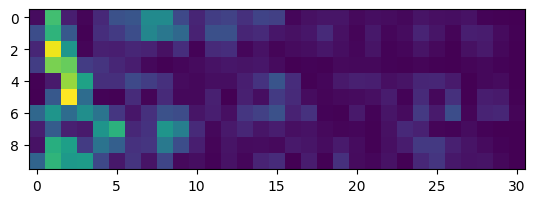

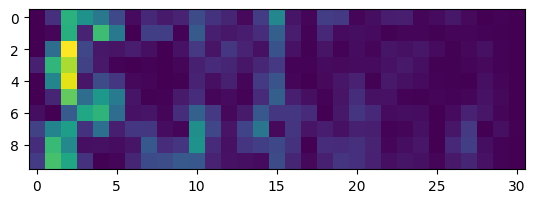

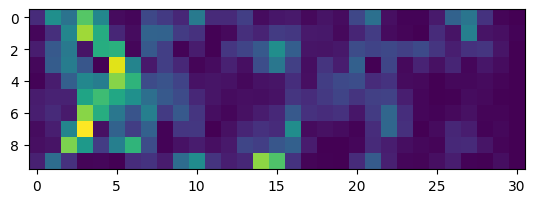

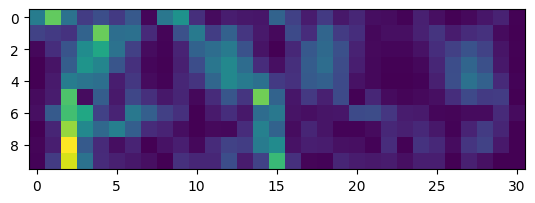

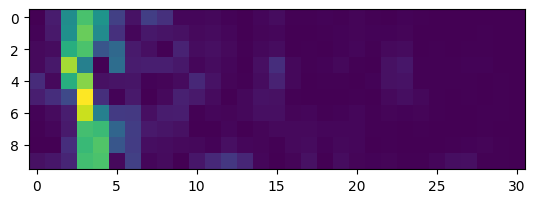

In [7]:
# prompt: show the variable x_ x_ is a set of images

import matplotlib.pyplot as plt
for image in X_[:10]:
  plt.imshow(image)
  plt.show()


In [8]:
X_.shape

(431, 10, 31, 1)

In [9]:
X_.max()

0.9461188534749133

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)


datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
)


datagen.fit(X_train)

augmentation_factor = 5


augmented_images = []
augmented_labels = []

for i in range(len(X_train)):
    img = X_train[i].reshape((1, *X_train[i].shape))
    label = y_train[i]
    counter = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(label)
        counter += 1
        if counter >= augmentation_factor:
            break


augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

X_train_augmented = np.concatenate((X_train, augmented_images), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_labels), axis=0)


In [11]:
X_train_augmented.shape

(2064, 10, 31, 1)

In [12]:
y_train_augmented.shape

(2064,)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=42)



In [14]:
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define input shape based on your data
input_shape = (10, 31, 1)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Dropout(0.5),  # Increase dropout rate
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),  # Increase dropout rate
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),  # Increase dropout rate
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model on training data
history = model.fit(X_train_augmented, y_train_augmented, epochs=200, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data (optional)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/200
65/65 [==============================] - 3s 30ms/step - loss: 0.6944 - accuracy: 0.5194 - val_loss: 0.6895 - val_accuracy: 0.5351
Epoch 2/200
65/65 [==============================] - 1s 23ms/step - loss: 0.6912 - accuracy: 0.5237 - val_loss: 0.6890 - val_accuracy: 0.5351
Epoch 3/200
65/65 [==============================] - 1s 22ms/step - loss: 0.6908 - accuracy: 0.5281 - val_loss: 0.6875 - val_accuracy: 0.5351
Epoch 4/200
65/65 [==============================] - 1s 22ms/step - loss: 0.6926 - accuracy: 0.5160 - val_loss: 0.6918 - val_accuracy: 0.5593
Epoch 5/200
65/65 [==============================] - 2s 26ms/step - loss: 0.6907 - accuracy: 0.5252 - val_loss: 0.6885 - val_accuracy: 0.5642
Epoch 6/200
65/65 [==============================] - 2s 36ms/step - loss: 0.6919 - accuracy: 0.5189 - val_loss: 0.6861 - val_accuracy: 0.5496
Epoch 7/200
65/65 [==============================] - 2s 32ms/step - loss: 0.6906 - accuracy: 0.5329 - val_loss: 0.6839 - val_accuracy: 0.5787
Epoch 

In [19]:
model.summary()
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 29, 32)         320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 14, 32)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 4, 14, 32)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 14, 64)         18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 2, 7, 64)         

In [16]:

y_pred_prob = model.predict(X_val)

y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


13/13 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       192
           1       0.95      0.98      0.96       221

    accuracy                           0.96       413
   macro avg       0.96      0.96      0.96       413
weighted avg       0.96      0.96      0.96       413



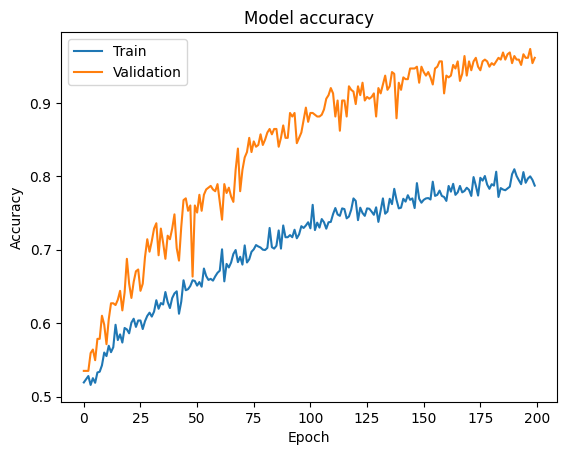

In [17]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


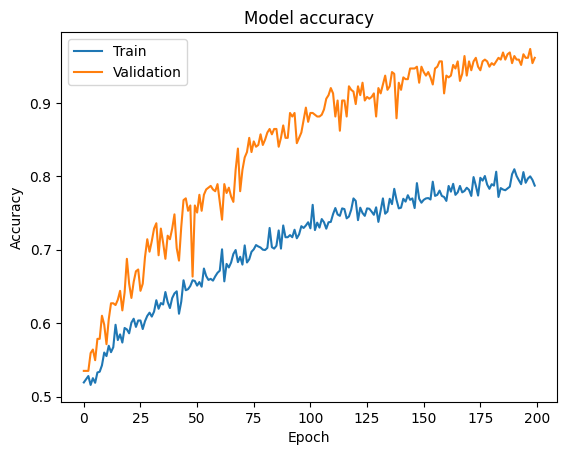

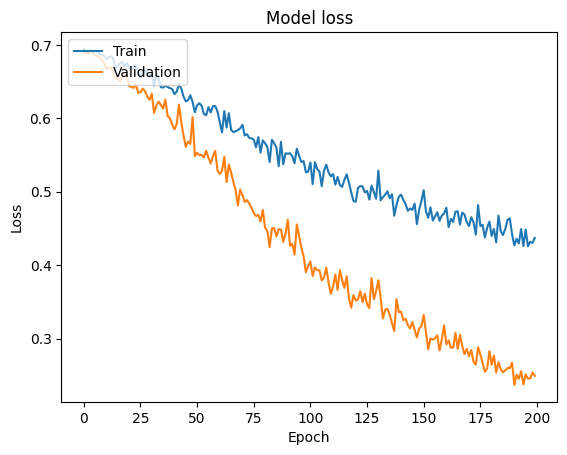

In [18]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
